<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/MEAP/EDL_MEAP_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Scenario Imports
import numpy as np
import random
import matplotlib.pyplot as plt

import os
import time
import cv2
import urllib.request
from IPython.display import clear_output

In [ ]:
#@title Image Helpers
def load_target_icon(icon_url, size):
  icon_path = "target_icon"    
  urllib.request.urlretrieve(icon_url,icon_path)
  target = cv2.imread(icon_path, cv2.IMREAD_GRAYSCALE) 
  return cv2.resize(src=target, dsize=size, interpolation=cv2.INTER_AREA)

def show_icon(icon_arr):    
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(255-icon_arr, cmap='Greys')
    plt.show()

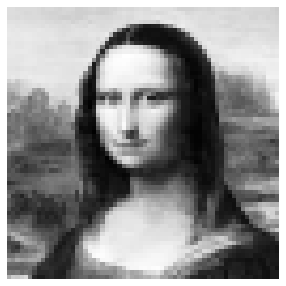

(64, 64)


In [ ]:
#@title Select the Target Image/Icon { run: "auto" }
target_icon = "Mona Lisa" #@param ["Mona Lisa", "Wolf", "Trash", "Happy"]
size = 64 #@param {type:"slider", min:16, max:64, step:1}

target_urls = { 
    "Mona Lisa" : "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZgVzl5ashVmS9cFLqcoAJT6SxCMxWlgbJOw&usqp=CAU",
    "Wolf" : 'https://www.clipartmax.com/png/middle/235-2350420_other-wolf-icon-16x16-images-loup-icon.png',
    "Trash" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAeFBMVEX///8AAABZWVmgoKCnp6fm5ub29vbFxcWRkZEqKiotLS1VVVW9vb2srKzV1dVERERMTEzLy8uzs7NkZGQ7Ozs2Njby8vLc3Nybm5uEhIQaGhpqampGRkbW1tbq6urOzs55eXmNjY0LCwtfX19ycnIbGxt+fn4jIyNwDIdUAAAFMUlEQVR4nO2d63aiMBRGi1zsBbQ6IlKt2uro+7/hoHZmdfiiJiE37bd/zoLM2ZWQ5CQkDw8WydJVPi6KJEniMyRJMe5XU5tB2CMbz/eRJK+zyne4yizrJ1m9E73cd8hKpDs1vSPl2HfY8sw0/A4MV74jl2Mw1BRs+Mh8Ry9Bou/XsEh9x3+VeSfBhsCf1Gmvq2AUBf3CyV67C0ZRyO2GgV/wQN+3x1k618G/hNrD6fYW/c4kzEZjYEwwina+ZURkHRp6JMSqaO4ZPfDkWwfJjApGUeJbCDD7E0bRW3AvmzPDwc+Xj6K/GrxX6YnqxPugYTXq5/FuckYx9m3UIhdGuY+X128diTtCobUYG1GQa8kETCFUHNmNWJHlmyDER+nbVyLD2mK86ogeUpUIRb2FZ2vR6rAV1COlAkSv4qB6p8+dq9ELllDYiVWLJYbXUyyij0VsrcSqxwjDUx7GYrsYUkXEWvSpnKl/xDJshKoJRveqXIagxZDoLrgCU9zybeE/0DCgzCKmLzQSZmgYUHOBfTaNfBl2i4I21Bij4+iEhibJLiLIk+aX7xAVgoaDa7eYII3Xm5fFcFJOni/wCcHtL10uBsqIni5cXTYhDV9787pbzirTmel0TdnBsfrtO3o5NBrfr1+w9B26LLqjEN3JavfoJuZu5ifUnXOsfIetgN5Qcuw7bAVKLcPbqYYNWoa176hV0BpKrn1HrYLWUPL+DQU50HDRMjS27sAFNKRh+KgY9svhgcXiRoZOJyaLY9TDjYSheDb3VpDpvtEwbO7fUGZeloZhQ8OfYSiYUL8hFjT8EYaCdRU3hMz6AeEas5vhhYY/wvDdd5CdkFlstqwb1tv1vGHTOwAzvIueHzYwKB8e//1XE+p2vd01gevNs8EclLfVu7CA0dBHYOEYwopwQ1/y0dAdNNSFhu6goS40dAcNdaGhO2ioCw3dYcsQvkiCUVk2aIFr0N/bl8Aqpmn7Cpy5XlyNRA/YSgDKhRzrW/uKtH1F9NG+JG5fgZnB65E4M4QNA9AQli7D52GYVaIhDWlIQxrSkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCGNKQhDU0ZOps/hJlXV4bX52r1uD637MgwA0NDW7fTkIY0pCENaUhDGtKQhjSkIQ1pSEMa0pCG/xvCvu00pCEN79cQttegIQ1pSMOuwDk54Rga+pqVhjSkIQ1pSEMaBmQ4heP17s5wT0Mayhomd28Y05CGNKQhDWlIQxrSUN8Q9mS/N8PlmyXDTSiGUzBcmTH81S53Fozh4M4M8Sml4a0Z8imlYfiGfErNGUJwrgzhTB8a0vCcIWzj7GgvaHeGNfzXeQtY55K1r8hhy++0fQV0q/HP5MzQETTUBgzXZspVpqKhLj/QcG6mXGUGd2+Ix2vaMtyYKVcZPObWlqHMYZ82wAO1bRnKHCtsA3eGZWamYFUKZ4YRngDjhJ07Qz8vU2wsTBlusWTI6ztgCev2ogjPJNICK7ggVWOdSiAoc864FJAAaugZ+vPJAuPjA3rnGwuYiUqPhvNtXdePB2Yn4m8khSLfb/4q71j2x+GEaZj+OmFK8GEqLt87Bsepc98uYgxWFMF7OgCMtlmCBsM/Rt91S982AiAd2Q1I13rn2XTnGLtunjHeHmewO6pfDJ1e+R1Rt9AfVjrGKXzP4Q9L3eIMPgj2hYVH9Etx7VvtyN7Q981CRAMp18ynFgWb943vn7E0tP3zBVKfPbjS2IjwItUMdjNywzx3l+RLR+MiiR2SFHmlV//+AF5Ms0xZGeWpAAAAAElFTkSuQmCC',
    "Happy" : 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAilBMVEUAAAD8/vz///+1t7XLzcspKik2Njb5+/mpqqnx8/Ho6uj3+ffb3duhoqHi5OJsbWx+f37Bw8G6vLp5enmXmJdzdHPNzs1UVVSjpaPm6OYWFhYgICCMjYyGh4ZMTUxcXVxERETW19Y9Pj0oKCgODg5BQUFnZ2eLjIswMDAbHBtPUE9aW1oUFBQiIyKCZkikAAANTklEQVR4nO1dZ5faOhBdC4NNM3UpCXULYbPJ//97zzZdM5JmZNkW7+R+yDkbsKyL2mjqy0sVeG82m++bOO5/NW84VvLq0nH4ns7CUKAIU8wa823dfbTGbjhbLk9cAhQXpklntX66Af3uJ4GGG2QaBPv+ru5eU/E2DqncJJ7t8aRZd++NOMSJBbsbyWjfn9fNQYP5om1P724op3UTwfEWR4XpXUmGw4+6+chYh27Y3UiOXuvmdIfWuOOU35nkclA3sTM+xo5mJ+SY+LAiB8ty6J05isWPevm9JiXyO5EM4vf6+DXHZfPLOUZxTfx+VMIv5ygmdRBsVMUv55hUfnasOzx+6PWJ9fzys0p+Lfr5fibTSDE9tk44TrM/GwmLpwjGPysjuAoo3cp63+32pitNS7/703HUJfIU7WE1/DZdQneyi+3+ldij4WuypJBMRblyqeX46Ju7kkmVQ+YlaL6aEUiKduk7zjYx9CKbcfHmy6btr21snK9C7F1TesTA2IF2XEiz9DpuG19R5hV5rH15tmU6uA6s93qOIijt/N/NdG9Oh2/oSGNmOozE2M17ZGx0rxWOt/L0QNK9rdty+bIzFtrxG+1cv2+qW5Ci++36fbolWAa/DClHzY/ad/w2NUFRzpTJoROe3FJsqd9Usii1Uk9VlxRbkeo1QqzdvQbFbqTkKPpWggWCpopgKmBUYFGZKC9qouNGq3pUEuxUpO5TDqPouGheNUVT8bMyvfRAtauKdvHGVSNYrXXhvaEcxaI/s2oNiqhiO9hUsZ2LTrHtRjlFG446TsenqiuFDg0FwRKlex3CEijiM0MEG2e9ZkGxGAtQxEU10auJ4MvL1jFFBcGZ007zsMVPRmG3rx/wxkLHneZh00N7ZSX8b3CCdVlJrkBVYaJr0RI6H4QHDkw4Rb5iY4+2cyihx2ygE5U9udZoK54Y1vG1yFMyDlCC9W4yd8AmqhCsJvwmqKDI0YajDXhEEJ+ojFNx5T1BBcU34sNfiPmsVkkGBcaQanxDDgrmMq4CmIwqaHo/VJipTdhWY4AwbJMM4dhv48lB+IgRMtcoog32XPU3ehIQWxhhLHbIUw4UWuUAk53/mh5Ctpmu8aG6sIngcCwMzwyRIfRwl7kgRrpreARq0J2bsZxiCfurv2TAIRRJzQ6eevzkDiLUnvtw59VhCnvc03wdquvq11qYgKwr9aC04IgnFfbVDi3OICJD6FNIgALIPFUN4hf8ahWecoUBDkXlIEINsCjNB8El4HVWMYg/4BdL8j1yDSCHKfZHZD57fRTeMIeHImpUBGeh0Hn3egXaIAINqRs3gEoAL+0R4iQC9Gulu8o4BBxEeMy9ge94eytEAFYiIqqAq/0zDSE2iGCXhPtMHR21xm/QffmkA2v1Wc7CC+AgGr/gyiuuIoDTXNadPvsQvnzIy0ySqYFoV+el4tvKwxlslY9ngWznsLgXTsKklyKZ/rbp37WVfW8pRC/5xfZJ2kkEHw3WLfkCwr3a/x1Ft6C7ru058zmLTkEz2b8drgcJmKb3xiTgWBLxYm8fHUBtOTakVjq8cQQr7d6IId8MtcocAOjEK8SS1bkM0DOfGePUBM/fTVP5rGDdKl4x3broMhfSFG2lzXE/AON0Ow+gTMpo91XlQszajeHl9NwKY9+SFeB32yVonuFh9K2OFmAQRIwJl1aoluv0SFQPFBhexk6qjkcUS7KK4F0dHcMxr4PFdt3wAHe6Akrh1Xpqhmzx0EX9MWLx5bl4dc4A7kF0/Qzu3ndB+w+tFcVSPneGrmqAF4zzB32ZOt2xRBuRSHZw0Ufe0qfCBzi2zo78skTHsNpru5aC1MinvhXGIMo/1WUhgibJh5Bij7+1RDJcoV6C962QY8fkLfnypNwgXaDBnQTvmiJNMN1ulbdC3msAw9Pwyz8h416h7xnVicM01en7wpd0gzhTmShPESOgo4AMJwzpPzm4I+ULTjaF2097iKhihuBEzDcCeQPC1MU4TFtEUPkYAoaZcAwObbpQ+sfEj9Y3hwzBistkPuDjR5pZJ5jWIe3INzJkGFAw4UVmyIk/0YWT522ZHJRyGJOJMK6a2BjKKn8OQ1neA33bUVpZmFpheEZ25WePyNWJ4QP1buobqRVwAZdB7xBwthBNKFGwXIT0+bCoamU0euXWCsftjMSQ0Z7+3pM3TwFipbbtEGD4VZCh/gZMtgzoBpHnOQgOxFVRhpo1xIgnUyt7uNp3WaWYKWSKMVTLNYK2kZ6AxzrmPxMva4PsA4YwZPt0q4JzeY63ylaY/sllMMQ7x85XhbfS5RovSmGYboWgdyxN7gkHpBX6JeCCchi+7ELJpmIVQ/Tde+QoxIifOaUkhukFJbykksvzcVtmVPvei7tmxnRt9w2lMXx5+ZyOc+Nhb7QtkKJyMxh1chPkaGfDr1SGnuAfw38M/cc/hv8Y+g8CwyfzSZTx/2dYwv3QM7i/4/sG93oa34Dp2oroS/0DxrCIzts/YDrvInYL/+Da9uQfMNvTH9mAZJM2yxcA16BcnSJbufnqH3+A2oDhZlpRFYkygJuZgBPKU4UDPQJspblOrIA/jW9Q+NMU8InyDcBR4ewBEMgUfa6xqAWQaM5bSgHfRM8AAmPOW0oB/1K/ALMHnf1LC/gI+wUYYnj5BHzwFIkGIMBpeBWxi/jq+wS1r36ReAuPoIm3gDEzhSLsyoPe918TMwOHV3/Pn9Z0nAz0gUbAUfbO2wUsRH0s/kenUUOCs2OozyWjjV0Dzh4m169Ou/KMwgtTrN4vmcR9/CE7hnQrxLJSjpO20TdAG0PKjwM+ZCXIKrsqv42EUdCCcsvDEPBjudMGRVANx89RZto3rXxDLDcUa4xhrpkGS4hx6ZVYjlmQsdmFDKT8knNcgQSEZtk0V9KJkrfVY3iK7TbKkXAWSsoYc+YMiHzmZ+uxNDH2cCo5TPGRk/UX0DoBI6nNa+zsqJWux1JEgMm5tpwIzR46hBGC+WkI/q/b3sWDKSF55TNwq9hOuq4S8tNA2ZQU5XA5ZrLiqltn6VCag1tFcxJBSo4h2yRDt5NUiHboJF/I67578+GjaW8peaKAnooaqrK+603mkFaMZHPVvaOXtkiSnGi5vqzztR0eQhIy573G3OqUfD80Oo/VcqmKTWLSPTCIVH3ND+kFmQNm2JizzpDtfDSTiwELqqEPbKSKnHvIIFLDCaZyJv7cgzKZTSiLaLee7JdIqWPRpjpgwqFRjD2SvpQ6Dm8zJHFH1usoEtO+6iR5X/QXIsILrAu6tR3JfanIUgSzDjPyl66VcWxCC9VDHXrlOnr+0oI5aMfkUvdGCE5AHgzbUd/fkZS8HDtUU10ylMkvZkjzrDzCWDpvlur03QFHwfQdZOWCdpDP+7XYXE23JuZtjJnP20VO9jd7jqkAz9UasHOyO8mr32x0LUhmCcz4Eh87r76r2gifMx7JTAxaWSh9LGojQBEvCLpWRVUH2Q2BxDITZe0y9dnUt0BrlFjmLT/uGiPNoX5hJ0YD2woaVjVKXNeZ+R3HsgRzL9L04wJKHrs6M2iKg6hgmZLNr2HSSbE8ZUTMsVivCmqwbGsFYdmtnFWP3RwOB1daK/t6T+gG5Z/ncIGaXc9Rdw2L4adviU9aO4+TgfxJ6x9yRCLsDPOJYuEaloo6pN6sRQd1SBW1ZD0ZRRe1ZFX1gL0YRbweML+gPV7T2YNRdFXTWVWXu3aK7upy+1lbfYArLa1qq6syw9a6Frf4XUylATZCQbG+UcRk0cBG0XKFgmJdNR9VSWyKRNtFOMWAvzU7gCInVbFwwhZOsY6I709VVwrGSzZV7UZW6il7KPYYB9EhRxVFdoKjInhXLMFAdIgZtTVQTtQKY2sUpyDvSqiGahR5NrAiUNp7XBVOU63F7EpWgXMiLJ9xfX3syoNHNVGzc6PsmkI7tcHOZdT5mzqxoWiXGpCpMUg6DqtXVy8QJXJcBWqTgPO8AZoCDUKMdo7fluHPXJPEV3TdJ0ZY6H5PMXI+jtO2xqYjojJ8Wjc6K5LruZrOT93bZiU57Wqz4QrRaTiS5FqhwSRX3gauq5aScQz2xWWAt/XewK/Um83AYNVNJ2tcqBj7YBmZXtGzvdATkRg5ChHb3ZA/+rHRLs6s42WFFWKZgiMZDnkK2rfNKCSY/UW7iqqFX/r029eRTPavtO11PlkkEcWrQVRWg1knajyy7EbxVNur/rTTNXkzXBtsVxefbNrOJZ7p4mkg0PtfgoaCaqOT1/p88zhPmmupooHlZ6UEXzLvKWfupASCSR11UX84dJk18KtKmQDQHJO2nKL8ojrTA/w2CQDF+QUxryaqczRLnatCLDzI0fFnzNwX6fS6viRTbaVnh3OO6fngVZ6cjSM//Ss90fAuc8XHr8DRbE2bCYelR1BbYb5oFyaZLr7ZqnLxhYFDvLcnmcVJ7QcF0vJXhNZ6TPXwfmQn2o3W82Q0XDRUQWkoNxEk/SfMKrqe9JYdzT3i/NGy01/v6u5rAWy3h1kY7rHbU5j+/3xbeRqYknBspvg5jHMM/mZ/VbTk/gPQmaTgDLt5jAAAAABJRU5ErkJggg=='  
    }

target_icon_url = target_urls[target_icon]
target = load_target_icon(target_icon_url, (size, size))
show_icon(target)
print(target.shape)

In [ ]:
#initial population
population = 300
genes = size*size
generations = 10000

pop = np.random.uniform(0,1, size=(population,genes))
print(pop)

[[0.96717795 0.58253238 0.50883004 ... 0.66012736 0.56485761 0.45932534]
 [0.0051947  0.7184842  0.10092101 ... 0.9750644  0.63776142 0.8298947 ]
 [0.44532318 0.61365804 0.36792529 ... 0.12125289 0.0042278  0.52158862]
 ...
 [0.82081745 0.91911894 0.14052652 ... 0.64040655 0.34861966 0.09825356]
 [0.53909186 0.156201   0.54099469 ... 0.60617522 0.24055953 0.4127462 ]
 [0.60705471 0.19614514 0.6577087  ... 0.21023868 0.99879611 0.53072005]]


In [ ]:
def render(individual):
  return np.reshape(individual, (-1, size))

def fitness(individual):
  """Calculates Mean Square Error Fitness for a render"""   
  fitness = (np.square(render(individual) - target)).mean(axis=None)
  return 1/fitness

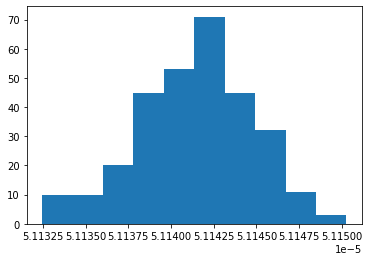

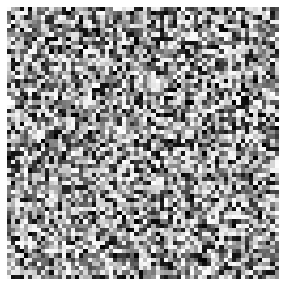

In [ ]:
def evaluate(pop):
  return np.array([fitness(ind) for ind in pop])

plt.hist(evaluate(pop))
show_icon(render(pop[0]))

In [ ]:
def elite_selection(fitness):
  return fitness.argsort()[:-2][::-1] 

parents = elite_selection(evaluate(pop))
print(parents)

[ 99 290 218 294 296 117  17 260 236 132  10 215 255 145 197  77 258  53
 121 119 253 247 153 265 234 115  93 113  56  81 259 165 135 201 162 216
  50 180  96 108  36  26 211 261 280 238 263 125 174  61 156  87 208  54
  57 284 188  80 286 116 163 160 254 106 166  51 142 158   8  18 275 134
  28 257 292  64 195 137 128 140 269   9 239  92  62  72  85 103 222  74
 297 230 231   5 100   7  47  84 249 192 210  32 229 190   2 152  88 272
 167 129  79  70 223  30 243 141 175  83 241  97 262 146 299 209  49  42
 182 151 133  40 164 176 184  69  59   3 138 178 202 281  68  31  41 285
 181  91 191 206  43 224 185 237  22 274 264  27 282  73   0 235 150  14
 123  98 266 118 220 198 177 256 127  33 291 203 295   4 194  38 159 214
 217 186 213 193  71 248 114  29 189 109 228 225 270 130  11 104   6  86
 271 173 111 101 240  94 161 227 155  23 277 276 252 251  65  44  48  45
  82 172 298  78 144 245 246 283  95 170 169  60  52 242 179 226 122 112
 204 287 250 168 183 232  75 273  58 244 278 157   

In [ ]:
def crossover(parent1, parent2, crossover_rate):
  # children are copies of parents by default
  child1, child2 = parent1.copy(), parent2.copy()  
  # check for recombination
  if random.random() < crossover_rate:
    # select crossover point that is not on the end of the string
    pt = random.randint(1, len(parent1)-2)
    # perform crossover    
    child1 = np.concatenate((parent1[:pt], parent2[pt:]))
    child2 = np.concatenate((parent2[:pt], parent1[pt:]))
  return [child1, child2]

crossover(parents[0],parents[1], .15)

[99, 290]

In [ ]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
	  # check for a mutation
    if random.random() < mutation_rate:      
      individual[i] = individual[i] + random.uniform(-.1,.1)
  return individual

mutation(pop[parents[0]], .5)

array([0.40136887, 0.66627371, 0.12740294, ..., 0.34417677, 0.70259273,
       0.69978833])

In [ ]:
def simple_GA(pop, crossover_rate=.5, mutation_rate=.05):   
  parents = elite_selection(evaluate(pop))
  children = np.zeros((population,genes))  
  for i in range(population):
    offspring = crossover(pop[parents[0]],pop[parents[1]], crossover_rate)
    children[i] = mutation(offspring[0],mutation_rate)  
  return children

pop = simple_GA(pop)
pop = simple_GA(pop)

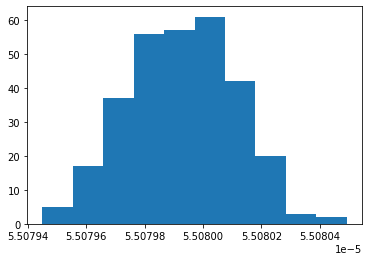

Generation 9901
    Max fitness 5.5080492159497795e-05
    Min fitness 5.5079450056730015e-05
    Mean fitness 5.5079930380296356e-05
    Std fitness 1.814383213367023e-10


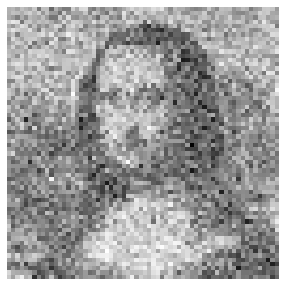

In [ ]:
#initial population
pop = np.random.uniform(0,1, size=(population,genes))
render_gen = 100

for i in range(generations):
  pop = simple_GA(pop)
  if i % render_gen == 0:  
    clear_output()
    fit = evaluate(pop) 
    parents = elite_selection(fit) 
    plt.hist(fit)
    plt.show()
    print(f"Generation {i+1}")
    print(f"    Max fitness {np.max(fit)}")
    print(f"    Min fitness {np.min(fit)}")
    print(f"    Mean fitness {np.mean(fit)}")
    print(f"    Std fitness {np.std(fit)}")
    show_icon(render(pop[parents[0]]))
    time.sleep(1)